## This template is to output text similarity score based on Bert embedding
ref: https://github.com/adsieg/text_similarity/blob/master/Different%20Embeddings%20%2B%20Cosine%20Similarity%20%2B%20HeatMap%20illustration.ipynb

### 1.Cosine Similarity equation

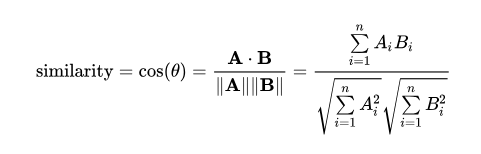

### 2.Embedding models

- Pre-trained word embedding models : 
     ->  Word2Vec (by Google)
     ->  GloVe (by Stanford)
     ->  fastText (by Facebook)
     ->  Bert (by Google)

### 3.Install different NLP libraries 

#### 3.1 Install Sentence-transformers

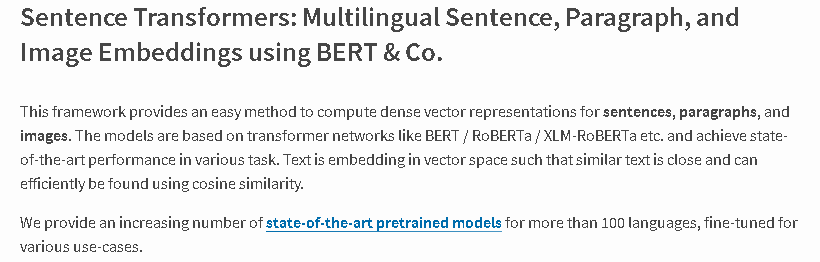

#### 3.2 Install bert-embedding 
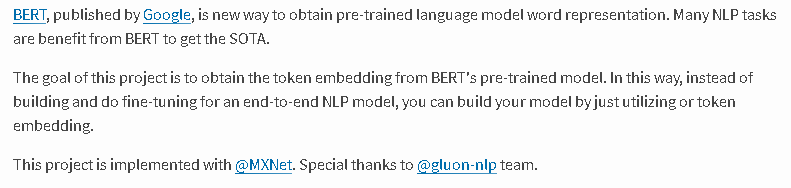

#### 3.3 Download pre-trained Glove model from University of Stanford
https://nlp.stanford.edu/projects/glove/
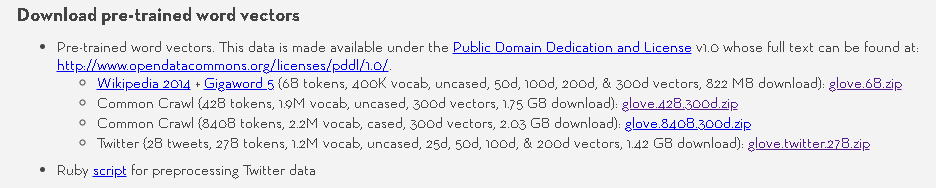

In [1]:
#https://pypi.org/project/sentence-transformers/
#!pip install sentence-transformers

In [2]:
#https://pypi.org/project/bert-embedding/
#pip install bert-embedding
# If you want to run on GPU machine, please install `mxnet-cu92`.
#pip install mxnet==1.4.0

In [3]:
'''
# download all nltk data, only need to run once
import nltk
nltk.download('all')
'''

"\n# download all nltk data, only need to run once\nimport nltk\nnltk.download('all')\n"

In [4]:
import re
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import scipy

### 4.Preprocess data

In [5]:
def preprocess(raw_text):

    # keep only words
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split 
    words = letters_only_text.lower().split()

    # remove stopwords
    stopword_set = set(stopwords.words("english"))
    cleaned_words = list(set([w for w in words if w not in stopword_set]))

    return " ".join(cleaned_words)

### 5.Use BERT sentence transformer

In [6]:
ss1 = 'The president greets the press in Chicago'
ss2 = 'Obama speaks to the media in Illinois'

In [7]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [8]:
def SentenceTransformer_BERT_method(s1, s2):
    vector_1 = sbert_model.encode(s1)
    vector_2 = sbert_model.encode(s2)
    cosine = scipy.spatial.distance.cosine(vector_1, vector_2)
    print('SentenceTransformer_BERT_method with a cosine distance asses that our two sentences are similar to',round((1-cosine)*100,2),'%')

In [9]:
# RESULT WITH PREPROCESS
SentenceTransformer_BERT_method(preprocess(ss1), preprocess(ss2))

SentenceTransformer_BERT_method with a cosine distance asses that our two sentences are similar to 69.64 %


In [10]:
# RESULT FROM RAW TEXT
SentenceTransformer_BERT_method(ss1, ss2)

SentenceTransformer_BERT_method with a cosine distance asses that our two sentences are similar to 69.97 %


### 6.Use BERT word embedding

In [12]:
import mxnet as mx
from bert_embedding import BertEmbedding

bert = BertEmbedding()

In [ ]:
def BERT_method(s1, s2):
    vector_1 = np.mean([result[1][0] for result in bert(s1.split(' '))],axis=0)
    vector_2 = np.mean([result[1][0] for result in bert(s2.split(' '))],axis=0)
    cosine = scipy.spatial.distance.cosine(vector_1, vector_2)
    print('BERT word Embedding method with a cosine distance asses that our two sentences are similar to',round((1-cosine)*100,2),'%')

In [ ]:
# RESULT WITH PREPROCESS
BERT_method(preprocess(ss1), preprocess(ss2))

In [ ]:
# RESULT FROM RAW TEXT
BERT_method(ss1, ss2)

### 7.Use GloVe word embedding

In [24]:
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    with open(gloveFile, encoding="utf8" ) as f:
        content = f.readlines()
    model = {}
    for line in content:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model

In [15]:
gloveFile = "../data_glove/glove.6B.50d.txt"
gloveModel = loadGloveModel(gloveFile)

Loading Glove Model
Done. 400000  words loaded!


In [46]:
def GloVe_method(s1, s2):
    vector_1 = np.mean([gloveModel[word] for word in s1.split(' ')],axis=0)
    vector_2 = np.mean([gloveModel[word] for word in s2.split(' ')],axis=0)
    cosine = scipy.spatial.distance.cosine(vector_1, vector_2)
    print('GloVe word Embedding method with a cosine distance asses that our two sentences are similar to',round((1-cosine)*100,2),'%')

In [47]:
# RESULT WITH PREPROCESS
GloVe_method(preprocess(ss1), preprocess(ss2))

GloVe word Embedding method with a cosine distance asses that our two sentences are similar to 81.25 %
